# Chapter 3

In [ ]:
my_list = [3, 2, 5]
sorted(my_list)

[2, 3, 5]

## Listing 3.1 All-ones or all-zeros tensors

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2,1))
print(x)

x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


## Listing 3.2 Random Tensors

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[-0.3897554 ]
 [-1.8581074 ]
 [-0.13673945]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.01080263]
 [0.42258883]
 [0.39823747]], shape=(3, 1), dtype=float32)


## Listing 3.3 NumPy arrays are assignable

In [ ]:
import numpy as np
x = np.ones(shape=(2,2))
x[0,0] = 0.

## Listing 3.4 TensorFlow tensors are not assignable

In [ ]:
x = tf.ones(shape=(2, 2))
x[0,0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

## Listing 3.5 Creating a TensorFlow variable

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.3490097 ],
       [ 0.44136307],
       [-1.2597609 ]], dtype=float32)>


## Listing 3.6 Assigning a value to a TensorFlow variable

In [ ]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

## Listing 3.7 Assigning a value to a subset of a TensorFlow variable

In [ ]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

## Listing 3.8 Using `assign_add()`

In [ ]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

## Listing 3.9 A few basic math operations

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

## Listing 3.10 Using the `GradientTape`

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

## Listing 3.11 Using `GradientTape` with constant tensor inputs

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

## Listing 3.12 Using nested gradient tapes to compute second-order gradients

Now you know about tensors, variables and tensor operations and you know how to compute gradients. This is enough to build any machine learning model based on gradient descent.

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

## Listing 3.13 Generating two classes of random points in a 2D plane

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

## Listing 3.14 Stacking the two classes into an array with shape (2000, 2)

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

## Listing 3.15 Generating the corresponding targets (0 and 1)

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

## Listing 3.16 Plotting the two point classes

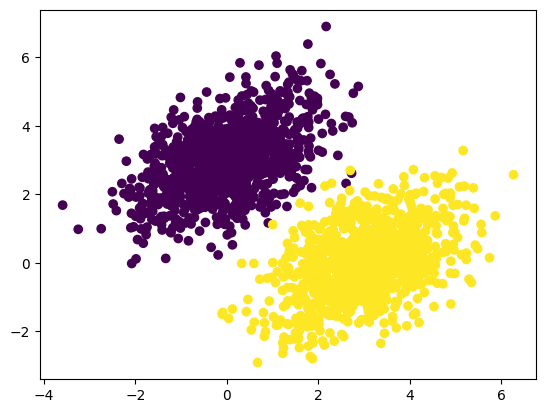

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

## Listing 3.17 Creating the linear classifier variables

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

## Listing 3.18 The forward pass function

In [ ]:
def model(inputs):
  return tf.matmul(inputs, W) + b

## Listing 3.19 The mean squared error loss function

In [ ]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

## Listing 3.20 The training step function

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

## Listing 3.21 The batch training loop

Loss at step 0: 0.0262
Loss at step 1: 0.0262
Loss at step 2: 0.0262
Loss at step 3: 0.0262
Loss at step 4: 0.0262
Loss at step 5: 0.0262
Loss at step 6: 0.0262
Loss at step 7: 0.0262
Loss at step 8: 0.0262
Loss at step 9: 0.0262
Loss at step 10: 0.0262
Loss at step 11: 0.0262
Loss at step 12: 0.0262
Loss at step 13: 0.0262
Loss at step 14: 0.0261
Loss at step 15: 0.0261
Loss at step 16: 0.0261
Loss at step 17: 0.0261
Loss at step 18: 0.0261
Loss at step 19: 0.0261
Loss at step 20: 0.0261
Loss at step 21: 0.0261
Loss at step 22: 0.0261
Loss at step 23: 0.0261
Loss at step 24: 0.0261
Loss at step 25: 0.0261
Loss at step 26: 0.0261
Loss at step 27: 0.0261
Loss at step 28: 0.0261
Loss at step 29: 0.0261
Loss at step 30: 0.0261
Loss at step 31: 0.0261
Loss at step 32: 0.0261
Loss at step 33: 0.0261
Loss at step 34: 0.0261
Loss at step 35: 0.0261
Loss at step 36: 0.0261
Loss at step 37: 0.0261
Loss at step 38: 0.0261
Loss at step 39: 0.0261


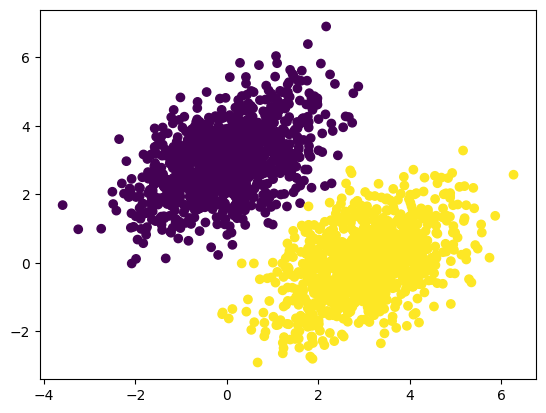

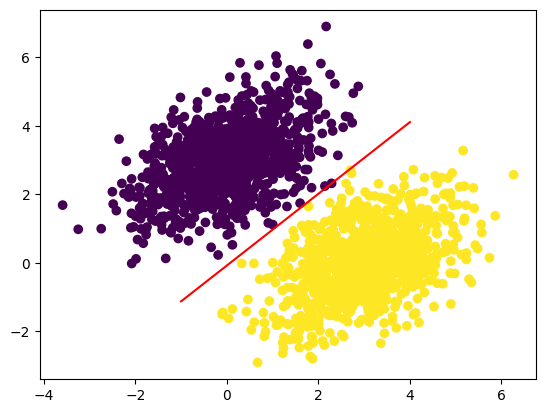

In [ ]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

# plot model's predictions on the training inputs
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

# our model, visualized as a line
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

## Listing 3.22 A Dense layer implemented as a Layer subclass


In [ ]:
from tensorflow import keras
import tensorflow as tf

class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,), initializer="zeros")

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
# When using Keras, you don't have to worry about size compatibility most of the
# time, because the layers you add to your models are dynamically built to match
# the shape of the incoming layer.
from tensorflow.keras import models, layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["accuracy"])

## Listing 3.23 Calling `fit()` with NumPy data

In [ ]:
history = model.fit(inputs, targets, epochs=5, batch_size=128)
history.history

Epoch 1/5
16/16 [==============================] - 0s 5ms/step - loss: 0.7712 - accuracy: 0.6435
Epoch 2/5
16/16 [==============================] - 0s 4ms/step - loss: 0.6747 - accuracy: 0.6520
Epoch 3/5
16/16 [==============================] - 0s 8ms/step - loss: 0.5879 - accuracy: 0.6690
Epoch 4/5
16/16 [==============================] - 0s 5ms/step - loss: 0.5098 - accuracy: 0.6885
Epoch 5/5
16/16 [==============================] - 0s 4ms/step - loss: 0.4410 - accuracy: 0.7015


{'loss': [0.7712062001228333,
  0.674746572971344,
  0.5879043936729431,
  0.5097733736038208,
  0.4410325288772583],
 'accuracy': [0.6434999704360962,
  0.6520000100135803,
  0.6690000295639038,
  0.6884999871253967,
  0.7014999985694885]}

## Listing 3.24 Using the `validation_data` argument

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)
print(loss_and_metrics)

Epoch 1/5
88/88 [==============================] - 2s 12ms/step - loss: 0.4064 - binary_accuracy: 0.9129 - val_loss: 0.0332 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0719 - binary_accuracy: 0.9564 - val_loss: 0.2108 - val_binary_accuracy: 0.8167
Epoch 3/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0773 - binary_accuracy: 0.9486 - val_loss: 0.1467 - val_binary_accuracy: 0.9217
Epoch 4/5
88/88 [==============================] - 1s 8ms/step - loss: 0.0745 - binary_accuracy: 0.9564 - val_loss: 0.0418 - val_binary_accuracy: 0.9950
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 0.0260 - binary_accuracy: 0.9983
[0.026035405695438385, 0.9983333349227905]


In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 3ms/step
[[ 0.0838975 ]
 [ 0.84821093]
 [ 0.41135544]
 [ 1.0645845 ]
 [ 0.91411024]
 [ 0.97204   ]
 [-0.03641772]
 [ 1.1270711 ]
 [ 1.0107777 ]
 [ 0.2553392 ]]


# Chapter 4

## Listing 4.1 Loading the IMDB dataset

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_data[0])

print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
max([max(sequence) for sequence in train_data])

9999

## Listing 4.2 Decoding review back to text

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Listing 4.3 Encoding the integer sequences via multi-hot encoding

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorize labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## Listing 4.4 Model definition

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

## Listing 4.5 Compiling the model

In [ ]:
model.compile(optimizer="rmsprop",
               loss="binary_crossentropy",
               metrics=["accuracy"])

## Listing 4.6 Setting aside a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Listing 4.7 Training your model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 71ms/step - loss: 0.5817 - accuracy: 0.7537 - val_loss: 0.4734 - val_accuracy: 0.8268
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3910 - accuracy: 0.8810 - val_loss: 0.3568 - val_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2940 - accuracy: 0.9045 - val_loss: 0.3077 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2344 - accuracy: 0.9244 - val_loss: 0.3003 - val_accuracy: 0.8792
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1975 - accuracy: 0.9353 - val_loss: 0.3039 - val_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1712 - accuracy: 0.9428 - val_loss: 0.2752 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1490 - accuracy: 0.9533 - val_loss: 0.2933 - val_accuracy: 0.8850
Epoch 8/20
30

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Listing 4.8 Plotting the training and validation loss

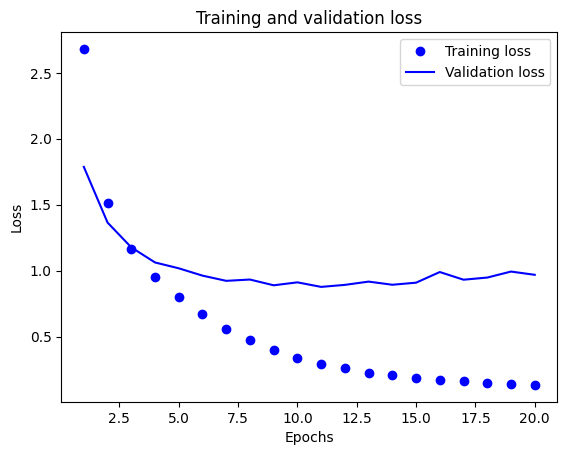

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Listing 4.9 Plotting the training and validation accuracy

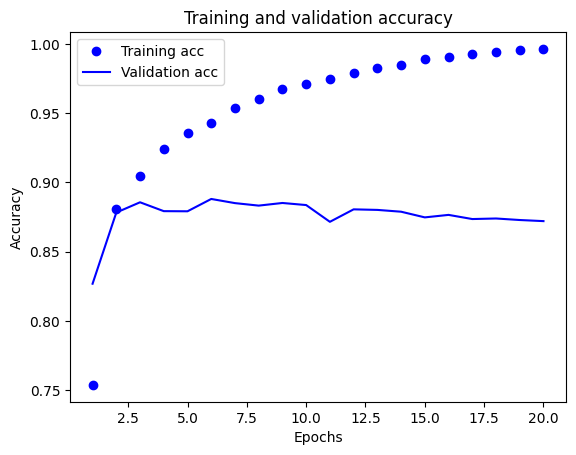

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Listing 4.10 Retraining a model from scratch

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4692 - accuracy: 0.8060
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2715 - accuracy: 0.9043
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2131 - accuracy: 0.9235
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2868 - accuracy: 0.8859
[0.28678733110427856, 0.8858799934387207]


In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.1679138 ],
       [0.9992754 ],
       [0.7508953 ],
       ...,
       [0.11210259],
       [0.06575298],
       [0.4921973 ]], dtype=float32)

## Listing 4.11 Loading the Reuters dataset

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
print(len(train_data))
print(len(test_data))

8982
2246


In [ ]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


## Listing 4.12 Decoding newswires back to text

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
print(train_labels[10])

3


## Listing 4.13 Encoding the input data

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## Listing 4.14 Encoding the labels

In [ ]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
# Built-in way to do one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Listing 4.15 Model definition

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

## Listing 4.16 Compiling the model

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Listing 4.17 Setting aside a validation set

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## Listing 4.18 Training the model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 39ms/step - loss: 2.6810 - accuracy: 0.4931 - val_loss: 1.7866 - val_accuracy: 0.6190
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5149 - accuracy: 0.6698 - val_loss: 1.3643 - val_accuracy: 0.6830
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.1628 - accuracy: 0.7419 - val_loss: 1.1763 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9537 - accuracy: 0.7894 - val_loss: 1.0618 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.7978 - accuracy: 0.8236 - val_loss: 1.0176 - val_accuracy: 0.7720
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6706 - accuracy: 0.8574 - val_loss: 0.9620 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5598 - accuracy: 0.8821 - val_loss: 0.9225 - val_accuracy: 0.7980
Epoch 8/20
16

## Listing 4.19 Plotting the training and validation loss

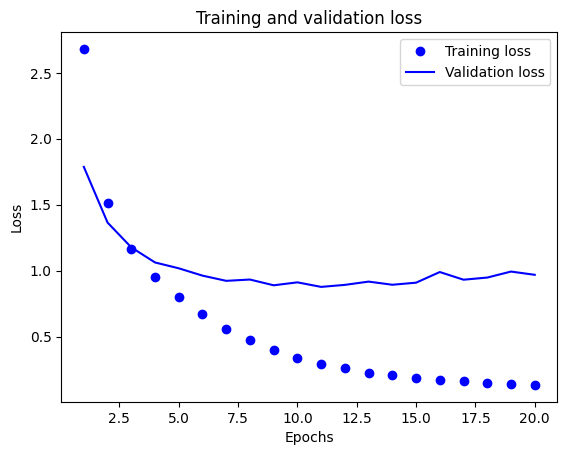

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Listing 4.20 Plotting the training and validation accuracy

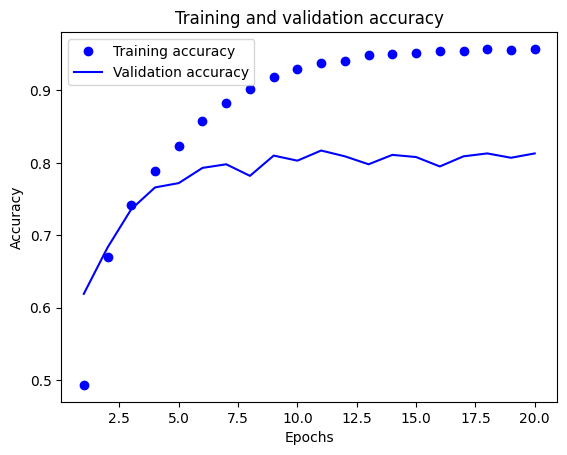

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Listing 4.21 Retraining a model from scratch

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.7168 - accuracy: 0.4939
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.5313 - accuracy: 0.6799
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.1551 - accuracy: 0.7543
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.9302 - accuracy: 0.8016
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7613 - accuracy: 0.8382
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6320 - accuracy: 0.8672
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5329 - accuracy: 0.8906
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4501 - accuracy: 0.9074
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9065 - accuracy: 0.7996
[0.9064648151397705, 0.7996438145637512]


In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(hits_array.mean())

0.1923419412288513


In [ ]:
predictions = model.predict(x_test)
print(predictions[0].shape)

71/71 [==============================] - 0s 3ms/step
(46,)


In [ ]:
print(np.sum(predictions[0]))

0.99999994


In [ ]:
print(np.argmax(predictions[0]))

3


In [ ]:
# different way to handle labels and loss: cast them to integer tensor
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## Listing 4.22 A model with an information bottleneck

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 11ms/step - loss: 2.8219 - accuracy: 0.5106 - val_loss: 2.0959 - val_accuracy: 0.5690
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.7821 - accuracy: 0.5854 - val_loss: 1.6959 - val_accuracy: 0.5850
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.5018 - accuracy: 0.5998 - val_loss: 1.5524 - val_accuracy: 0.6020
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3661 - accuracy: 0.6465 - val_loss: 1.4865 - val_accuracy: 0.6270
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2733 - accuracy: 0.6599 - val_loss: 1.4553 - val_accuracy: 0.6320
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1946 - accuracy: 0.6671 - val_loss: 1.4254 - val_accuracy: 0.6330
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1291 - accuracy: 0.6828 - val_loss: 1.4067 - val_accuracy: 0.6370
Epoch 8/20
63/63 [=

## Listing 4.23 Loading the Boston housing dataset

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
print(train_data.shape)

(404, 13)


In [ ]:
print(test_data.shape)

(102, 13)


In [ ]:
print(train_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

## Listing 4.24 Normalizing the data

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
print(test_data)

[[ 1.55369355 -0.48361547  1.0283258  ...  0.78447637 -3.48459553
   2.25092074]
 [-0.39242675 -0.48361547 -0.16087773 ... -0.30759583  0.42733126
   0.47880119]
 [-0.39982927 -0.48361547 -0.86940196 ...  0.78447637  0.44807713
  -0.41415936]
 ...
 [-0.20709507 -0.48361547  1.24588095 ... -1.71818909  0.37051949
  -1.49344089]
 [-0.36698601 -0.48361547 -0.72093526 ... -0.48960787  0.39275481
  -0.41829982]
 [-0.0889679  -0.48361547  1.24588095 ... -1.71818909 -1.21946544
  -0.40449827]]


## Listing 4.25 Model Definition

In [ ]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model


## Listing K-fold validation

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
      axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
      axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
print(all_scores)

[2.0025887489318848, 2.4383976459503174, 2.5118489265441895, 2.4299283027648926]


In [ ]:
print(np.mean(all_scores))

2.345690906047821


## Listing 4.27 Saving the validation logs at each fold

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
      axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
      axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets),
                      epochs=num_epochs, batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)



Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


## Listing 4.28 Building the history of successive mean K-fold validation scores

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

## Listing 4.29 Plotting validation scores

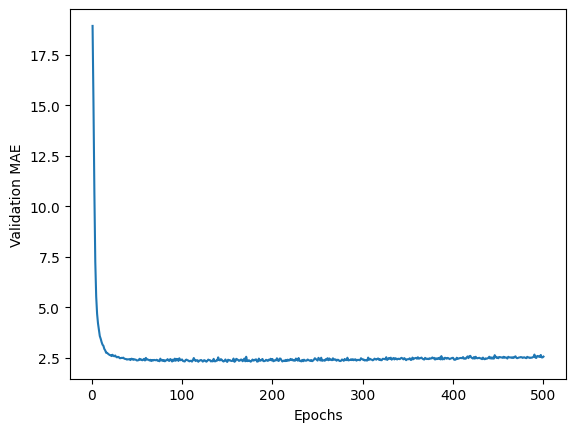

In [ ]:
plt.plot(range(1, len(average_mae_history) +1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

## Listing 4.30 Plotting validation scores, excluding the first 10 data points

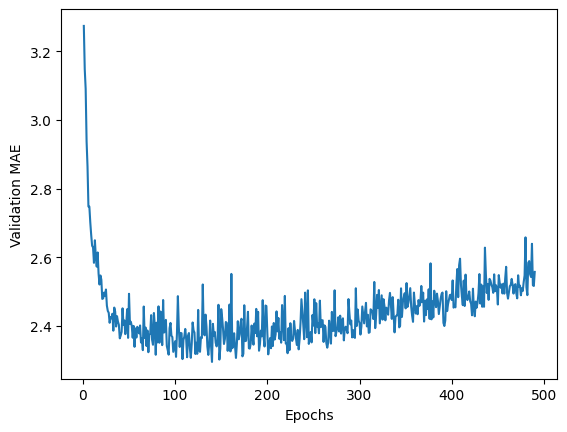

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

## Listing 4.31 Training the final model

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 16.3931 - mae: 2.5309


In [ ]:
print(test_mae_score)

2.530907154083252


In [ ]:
predictions = model.predict(test_data)
print(predictions[0])

4/4 [==============================] - 0s 2ms/step
[7.882922]


# Chapter 5: Fundamentals of machine Learning

## Listing 5.1 Adding white noise channels or all-zeros channels to MNIST

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 2s 0us/step


## Listing 5.2 Training the same model on MNIST data with noise channels or all-zero channels

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax"),
  ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.6097 - accuracy: 0.8141 - val_loss: 0.2582 - val_accuracy: 0.9214
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2522 - accuracy: 0.9225 - val_loss: 0.1842 - val_accuracy: 0.9448
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1647 - accuracy: 0.9484 - val_loss: 0.1948 - val_accuracy: 0.9424
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1178 - accuracy: 0.9631 - val_loss: 0.1476 - val_accuracy: 0.9528
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9724 - val_loss: 0.2401 - val_accuracy: 0.9285
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0658 - accuracy: 0.9798 - val_loss: 0.2307 - val_accuracy: 0.9310
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 0.1191 - val_accuracy: 0.9678
Epoch 

## Listing 5.3 Plotting a validation accuracy comparison

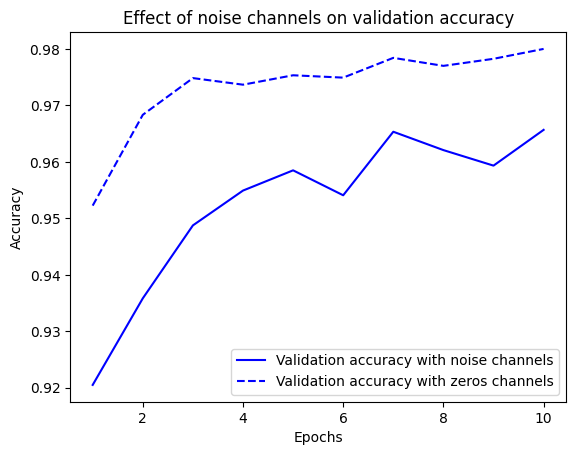

In [ ]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## Listing 5.4 FItting an MNIST model with randomly shuffled labels

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3149 - accuracy: 0.1028 - val_loss: 2.3051 - val_accuracy: 0.1030
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2984 - accuracy: 0.1192 - val_loss: 2.3137 - val_accuracy: 0.1028
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2907 - accuracy: 0.1273 - val_loss: 2.3178 - val_accuracy: 0.1041
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2776 - accuracy: 0.1426 - val_loss: 2.3268 - val_accuracy: 0.0997
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2613 - accuracy: 0.1520 - val_loss: 2.3333 - val_accuracy: 0.1029
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2420 - accuracy: 0.1656 - val_loss: 2.3523 - val_accuracy: 0.1008
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2197 - accuracy: 0.1818 - val_loss: 2.3628 - val_accuracy: 0.1050

## Listing 5.5 Holdout validation

In [ ]:
# Note: This doesn't execute, but used as an example of how to perform simple holdout validation?
num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
training_data = data[num_validation_samples:]
model = get_model()
model.fit(training_data, ...)
validation_score = model.evaluate(validation_data, ...)

model = get_model()
model.fit(np.concatenate([training_data, validation_data]), ...)
test_score = model.evaluate(test_data, ...)

## Listing 5.6 K-fold cross-validation

In [ ]:
# Note: This also doesn't execute, but is used to exemplify how to perform K-fold cross validation
k = 3
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []
for fold in range(k):
    validation_data = data[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate(
        data[:num_validation_samples * fold],
        data[num_validation_samples * (fold + 1):])
    model = get_model()
    model.fit(training_data, ...)
    validation_score = model.evaluate(validation_data, ...)
    validation_scores.append(validation_score)
validation_score = np.average(validation_scores)
model = get_model()
model.fit(data, ...)
test_score = model.evaluate(test_data, ...)

## Listing 5.7 Training an MNIST model with an incorrectly high learning rate

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 549.4510 - accuracy: 0.3392 - val_loss: 2.1998 - val_accuracy: 0.2196
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 4.1089 - accuracy: 0.2231 - val_loss: 2.2452 - val_accuracy: 0.2540
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6502 - accuracy: 0.2092 - val_loss: 2.4101 - val_accuracy: 0.1703
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4157 - accuracy: 0.2173 - val_loss: 2.0573 - val_accuracy: 0.2612
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2789 - accuracy: 0.2033 - val_loss: 2.2434 - val_accuracy: 0.1955
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3909 - accuracy: 0.2192 - val_loss: 2.1158 - val_accuracy: 0.2193
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5673 - accuracy: 0.2187 - val_loss: 2.0397 - val_accuracy: 0.2486
Epoc

## Listing 5.8 The same model with a more appropriate learning rate

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3457 - accuracy: 0.9142 - val_loss: 0.1236 - val_accuracy: 0.9629
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1243 - accuracy: 0.9654 - val_loss: 0.1309 - val_accuracy: 0.9687
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0973 - accuracy: 0.9744 - val_loss: 0.1484 - val_accuracy: 0.9662
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0784 - accuracy: 0.9796 - val_loss: 0.1578 - val_accuracy: 0.9689
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0700 - accuracy: 0.9826 - val_loss: 0.1440 - val_accuracy: 0.9737
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0588 - accuracy: 0.9851 - val_loss: 0.1834 - val_accuracy: 0.9718
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0528 - accuracy: 0.9872 - val_loss: 0.1885 - val_accuracy: 0.9703
Epoch 

## Listing 5.9 A simple logistic regression on MNIST

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.6661 - accuracy: 0.8357 - val_loss: 0.3589 - val_accuracy: 0.9035
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3528 - accuracy: 0.9036 - val_loss: 0.3092 - val_accuracy: 0.9134
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3179 - accuracy: 0.9114 - val_loss: 0.2958 - val_accuracy: 0.9167
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.9158 - val_loss: 0.2855 - val_accuracy: 0.9194
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.9186 - val_loss: 0.2787 - val_accuracy: 0.9222
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2855 - accuracy: 0.9204 - val_loss: 0.2741 - val_accuracy: 0.9244
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2807 - accuracy: 0.9216 - val_loss: 0.2727 - val_accuracy: 0.9248
Epoch 

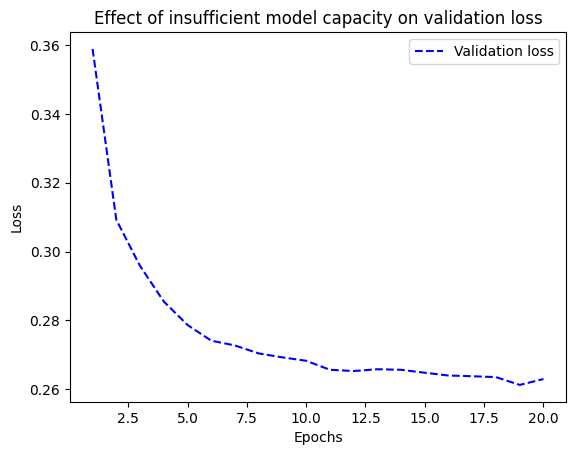

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3793 - accuracy: 0.8953 - val_loss: 0.2235 - val_accuracy: 0.9338
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1686 - accuracy: 0.9500 - val_loss: 0.1491 - val_accuracy: 0.9555
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1178 - accuracy: 0.9643 - val_loss: 0.1137 - val_accuracy: 0.9658
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0910 - accuracy: 0.9722 - val_loss: 0.1040 - val_accuracy: 0.9693
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0726 - accuracy: 0.9779 - val_loss: 0.1046 - val_accuracy: 0.9672
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0602 - accuracy: 0.9814 - val_loss: 0.0959 - val_accuracy: 0.9720
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0502 - accuracy: 0.9845 - val_loss: 0.0957 - val_accuracy: 0.9722
Epoch 

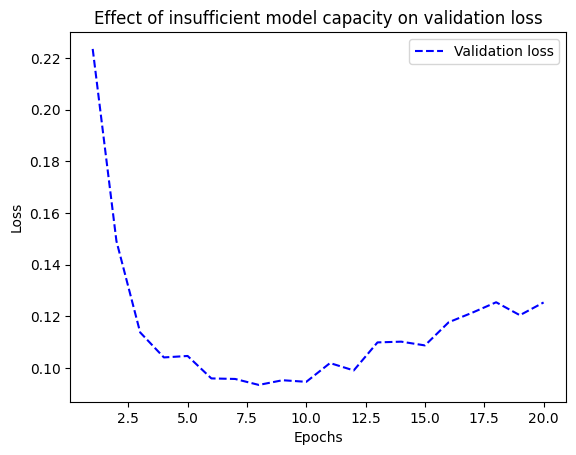

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Listing 5.10 Original Model

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 2s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5148 - accuracy: 0.7913 - val_loss: 0.3927 - val_accuracy: 0.8719
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3237 - accuracy: 0.8955 - val_loss: 0.3128 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2446 - accuracy: 0.9172 - val_loss: 0.2920 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1996 - accuracy: 0.9328 - val_loss: 0.2787 - val_accuracy: 0.8914
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1686 - accuracy: 0.9442 - val_loss: 0.2811 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1432 - accuracy: 0.9531 - val_loss: 0.2970 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1225 - accurac

## Listing 5.11 Version of the model with lower capacity

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.6281 - accuracy: 0.6353 - val_loss: 0.5776 - val_accuracy: 0.6540
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5375 - accuracy: 0.7835 - val_loss: 0.5222 - val_accuracy: 0.7998
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4897 - accuracy: 0.8463 - val_loss: 0.4976 - val_accuracy: 0.8076
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4554 - accuracy: 0.8793 - val_loss: 0.4801 - val_accuracy: 0.8290
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4295 - accuracy: 0.9017 - val_loss: 0.4716 - val_accuracy: 0.8323
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.4074 - accuracy: 0.9180 - val_loss: 0.4505 - val_accuracy: 0.8772
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3888 - accuracy: 0.9323 - val_loss: 0.4566 - val_accuracy: 0.8569
Epoch 8/20
30

## Listing 5.12 Version of the model with higher capacity

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 69ms/step - loss: 0.5587 - accuracy: 0.7150 - val_loss: 0.3916 - val_accuracy: 0.8472
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3168 - accuracy: 0.8726 - val_loss: 0.3177 - val_accuracy: 0.8621
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2315 - accuracy: 0.9073 - val_loss: 0.2903 - val_accuracy: 0.8809
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1743 - accuracy: 0.9299 - val_loss: 0.2782 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1470 - accuracy: 0.9449 - val_loss: 0.2845 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0930 - accuracy: 0.9689 - val_loss: 0.3248 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0798 - accuracy: 0.9761 - val_loss: 0.3483 - val_accuracy: 0.8854
Epoch 8/20
30

## Listing 5.13 Adding L2 Weight regularization to the model

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 86ms/step - loss: 0.6001 - accuracy: 0.7783 - val_loss: 0.4677 - val_accuracy: 0.8623
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4000 - accuracy: 0.8947 - val_loss: 0.3945 - val_accuracy: 0.8798
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3341 - accuracy: 0.9123 - val_loss: 0.3791 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2993 - accuracy: 0.9243 - val_loss: 0.3600 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2750 - accuracy: 0.9347 - val_loss: 0.3733 - val_accuracy: 0.8803
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2619 - accuracy: 0.9377 - val_loss: 0.3687 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2484 - accuracy: 0.9451 - val_loss: 0.3697 - val_accuracy: 0.8836
Epoch 8/20
30

## Listing 5.15 Adding dropout to the IMDB model

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 69ms/step - loss: 0.6416 - accuracy: 0.6267 - val_loss: 0.5435 - val_accuracy: 0.8054
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5286 - accuracy: 0.7523 - val_loss: 0.4275 - val_accuracy: 0.8715
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.4521 - accuracy: 0.8101 - val_loss: 0.3614 - val_accuracy: 0.8778
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3910 - accuracy: 0.8479 - val_loss: 0.3180 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3430 - accuracy: 0.8722 - val_loss: 0.2985 - val_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3088 - accuracy: 0.8854 - val_loss: 0.2843 - val_accuracy: 0.8928
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2747 - accuracy: 0.9036 - val_loss: 0.2764 - val_accuracy: 0.8883
Epoch 8/20
30